In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset

**Goal:** build a model to predict whether the target variable `income` of an individual is bigger or smaller than $50,000 per year.

**Dataset:** https://archive.ics.uci.edu/ml/datasets/Adult from the 1994 United States Census Bureau data. 

**Features:**
- age
- workclass
- education
- education-num: _numeric representation of the education attribute._
- marital-status
- occupation
- relationship
- race
- sex
- capital-gain
- capital-loss
- hours-per-week
- native-country
- fnlwgt: _the weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly by the Population Division at the Census Bureau. 3 sets of controls are used. These are: a single cell estimate of the population 16+ for each state, conhtrols for hispanic origin by age and sex, and controls by race, age and sex._

**Read the file:**

In [3]:
df = pd.read_csv('income_dataset.csv')
df.head(20)

,age,worklass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,3
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,4
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,5
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,6
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,7
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,8
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,9


In [4]:
df.shape

(32561, 16)

**Describe the dataset:**

In [5]:
df.dtypes

age                int64
worklass          object
fnlwgt             int64
education         object
education-num      int64
martial-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
id                 int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
worklass          32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
martial-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
id                32561 non-null int64
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [7]:
df.describe(include='all')

,age,worklass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,id
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561,32561.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720,NaN
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN,16280.000000
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN,9399.695394
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,8140.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,16280.000000
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN,24420.000000


**Find out if classes are balanced**:

In [8]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

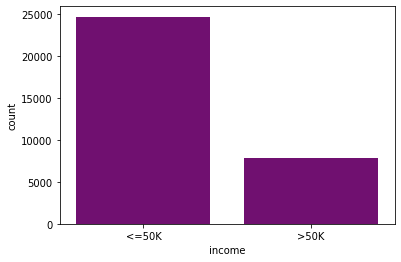

In [9]:
sns.countplot(df['income'], color='purple');

Classes are not balanced. This is important to choose the right metrics for performance evaluation and it has to be taken into acount when training the algorithm.

**Find out if there are missing values in the dataset:**

In [10]:
df.isna().sum()

age               0
worklass          0
fnlwgt            0
education         0
education-num     0
martial-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
id                0
dtype: int64

There are no values identified as `NaN`. However, there might be other characters representing missing values in the categorical features. I can explore this finding the categories present in those features:

In [11]:
df['worklass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: worklass, dtype: int64

In [12]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [13]:
df['martial-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: martial-status, dtype: int64

In [14]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [15]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [16]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [17]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [18]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

**Missing values:** the character `?` is a missing value. The missing values are in the categorical features `worklass`, `occupation` and `native-country`. For the missing values I will create for each feature a new category called `unknown`. An alternative could be to build a model to predict those missing values.

In [19]:
df.replace('?', 'unknown', inplace=True)

In [20]:
# check if the character ? is present
df[df['worklass'].str.contains('\?')]

,age,worklass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,id


**Explore both the distribution of single variables and the relationships between two variables with pair plots:**

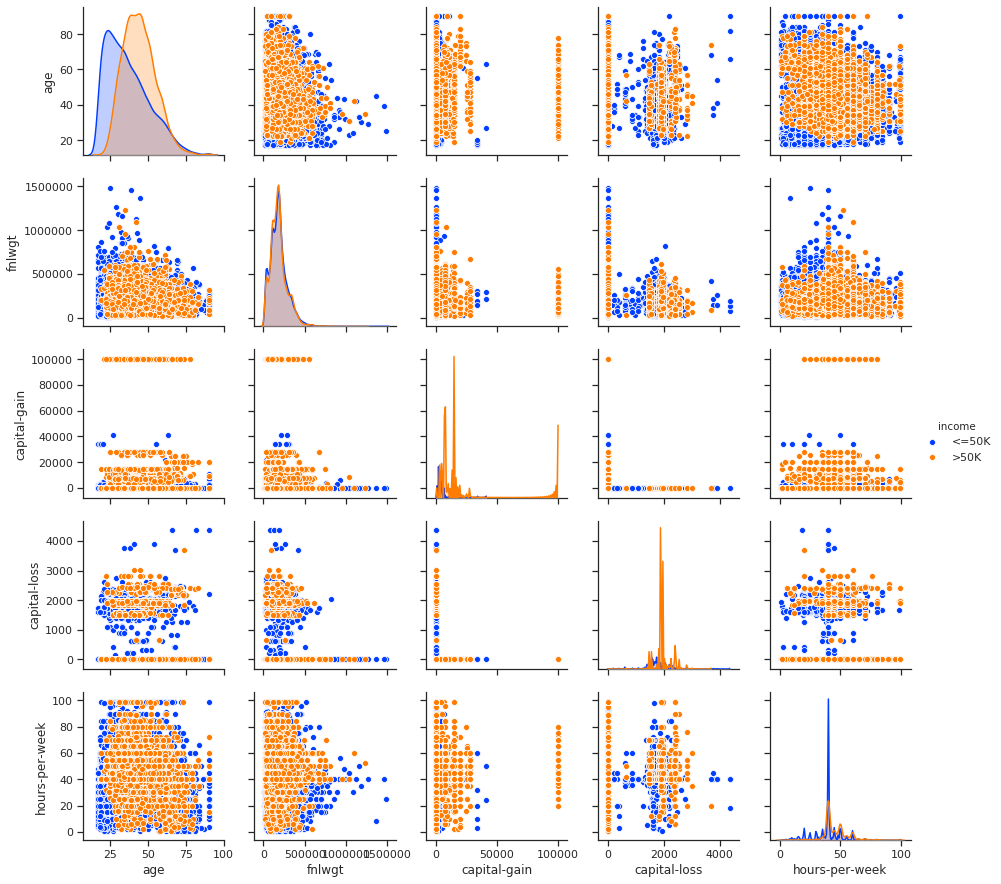

In [21]:
data_income = df[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']]
sns.set(style='ticks', color_codes=True)
s = sns.pairplot(data_income, hue='income', palette='bright', dropna=True) 

- Age: people with income >50K are older than people with lower income.
- Capital-gain: many people with income >50K show capital gain around 20000, 25000 and 100000.
- Capital-loss: many people with income >50K show capital loss around 2000.
- Hours per week: people with lower income work up to 100 hours per week.  

**Explore the relationship of some variables with the income:**

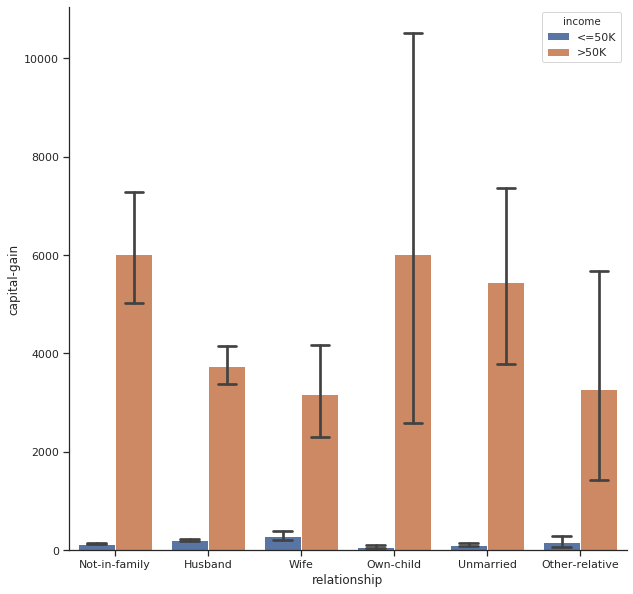

In [22]:
fig, ax = plt.subplots(figsize=(10, 10)) 
sns.barplot(data = df, x='relationship', y='capital-gain', hue='income', capsize=.2, ax=ax)
sns.despine(fig)

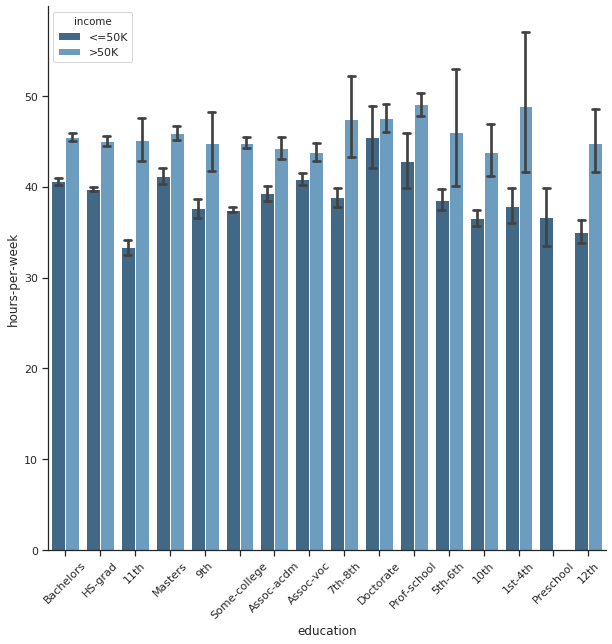

In [23]:
fig, ax = plt.subplots(figsize=(10, 10)) #ci= confidence interval
sns.barplot(data = df, x='education', y='hours-per-week', hue='income', palette='Blues_d', capsize=.2, ax=ax)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45) 
sns.despine(fig)

**Explore the correlation between numerical features:**

In [24]:
# standard correlation coefficient, Pearson's
data = df[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
corr_matrix = data.corr()

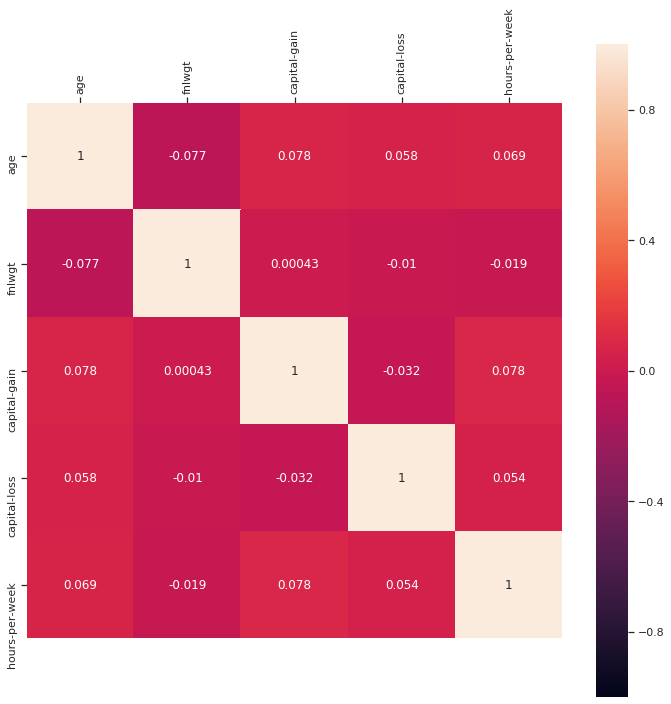

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, square=True, annot=True, cbar=True, 
            ax=ax, vmin=-1, vmax=1, annot_kws={"size": 12})
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
ax.xaxis.set_ticks_position('top');

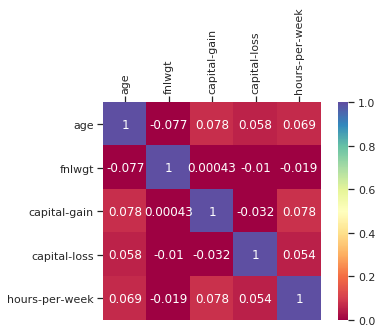

In [26]:
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=True, cbar=True, square=True, 
vmax=1, vmin=0, ax=ax, cmap='Spectral')
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
ax.xaxis.set_ticks_position('top')

**Note**: if the correlation matrices made with seaborn heatmaps show top and bottom boxes cut off it is necessary to downgrade matplotlib to a prior version.
https://github.com/mwaskom/seaborn/issues/1773

- There is a positive correlation between `age` and `capital-gain` and `hours-per-week`. 
- There is a positive correlation between `capital-gain` and `hours-per-week`.
- There is a negative correlation between `fnlwgt` and `age`.

**Explore the presence of outliers in numerical features:**

In [27]:
data = df[['age','capital-gain', 'capital-loss', 'hours-per-week']] 

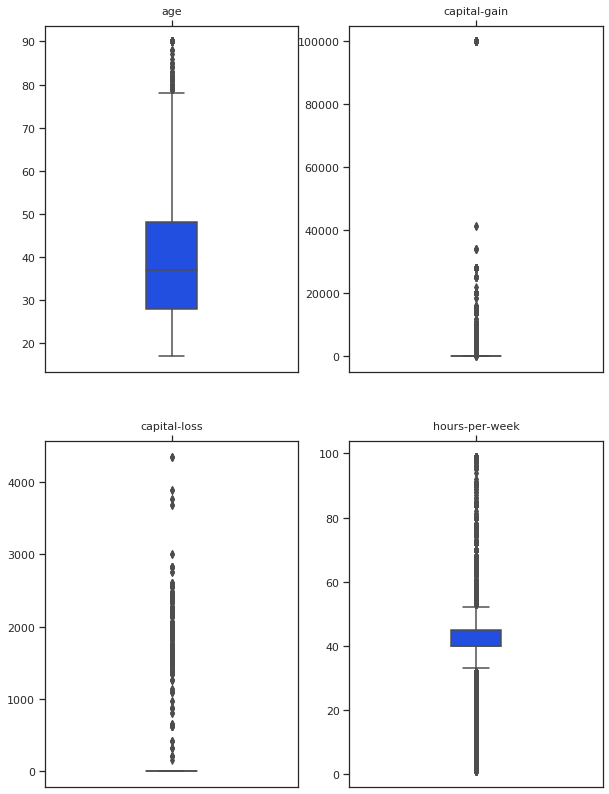

In [28]:
fig, axes = plt.subplots(2,2, figsize=(10,14))
i = 0
for c,ax in zip(data.columns, axes.flat):
    d = data[c].values
    sns.boxplot(data=d, ax=ax, palette='bright', width=0.2)
    ax.set_xticklabels(labels=[list(data.columns)[i]], rotation=0)
    ax.xaxis.set_ticks_position('top')
    i=i+1;

In [29]:
max(df['capital-gain'])

99999

I could consider that values of `capital-gain` of 99999 are outliers and remove them but I did not make that choice because there are people in society with extraordinary income.  

**Explore the distribution of values for each feature:**

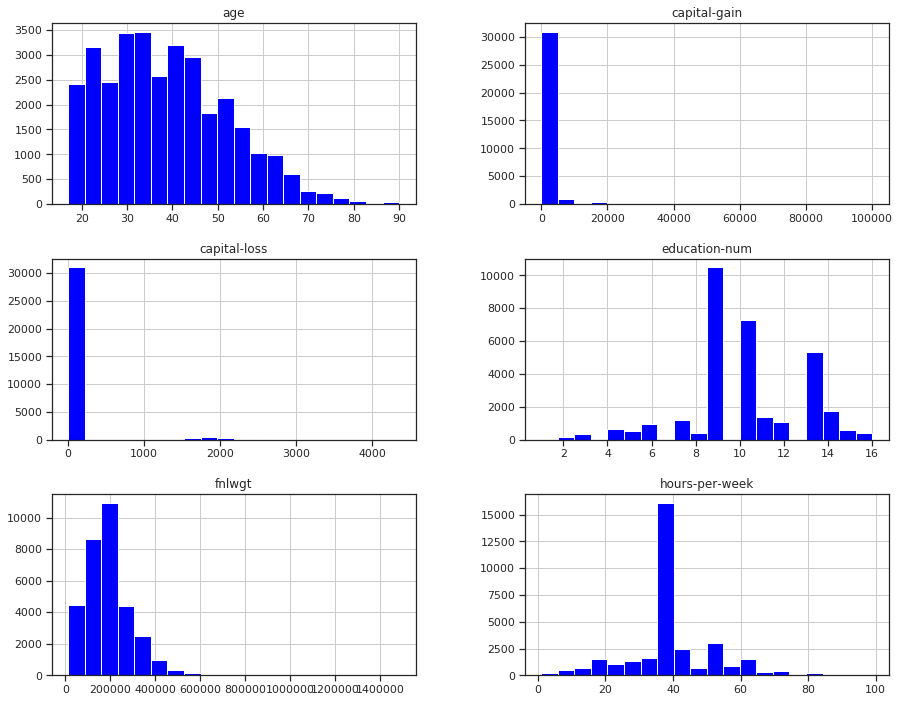

In [30]:
hist = df.iloc[:,:-1]
hist.hist(figsize=(15,12),bins = 20, color='blue');

- The features showed skewed distributions.
- Most of the people are younger than 50 years old.
- Most of the people have `capital-gain` and `capital-loss` close to 0.
- Most of the people completed 8th grade and beyond.
- Many people work 40 hours per week.

**Measure of association between categorical features:**

In [31]:
# https://pypi.org/project/researchpy/
import researchpy

researchpy.crosstab(df['worklass'], df['education'])

education                                                     \
                      10th  11th 12th 1st-4th 5th-6th 7th-8th  9th Assoc-acdm   
worklass                                                                        
Federal-gov              6     9    5       0       1       2    3         55   
Local-gov               31    36   19       4       9      28   23         88   
Never-worked             2     1    0       0       0       1    0          0   
Private                695   923  333     136     266     424  387        729   
Self-emp-inc            19    14    7       2       4      14   10         35   
Self-emp-not-inc        67    60   19      13      19      94   34         71   
State-gov               13    14   10       1       4      10    6         41   
Without-pay              0     0    0       0       0       1    0          1   
unknown                100   118   40      12      30      72   51         47   
All                    933  1175  433     168     333     646  514       1067   

                                                                          \
                 Assoc-voc Bachelors Doctorate HS-grad Masters Preschool   
worklass                                                                   
Federal-gov             38       212        16     263      67         0   
Local-gov               86       477        27     503     342         4   
Never-worked             0         0         0       1       0         0   
Private               1005      3551       181    7780     894        41   
Self-emp-inc            38       273        35     279      79         0   
Self-emp-not-inc       108       399        50     866     124         0   
State-gov               46       270        89     268     169         1   
Without-pay              0         0         0       9       0         0   
unknown                 61       173        15     532      48         5   
All                   1382      5355       413   10501    1723        51   

                                                  
                 Prof-school Some-college    All  
worklass                                          
Federal-gov               29          254    960  
Local-gov                 29          387   2093  
Never-worked               0            2      7  
Private                  257         5094  22696  
Self-emp-inc              81          226   1116  
Self-emp-not-inc         131          486   2541  
State-gov                 31          325   1298  
Without-pay                0            3     14  
unknown                   18          514   1836  
All                      576         7291  32561

In [32]:
# calculating cell proportions

crosstab_cell = researchpy.crosstab(df['worklass'], df['education'], prop= 'cell')

crosstab_cell

education                                            \
                      10th  11th  12th 1st-4th 5th-6th 7th-8th   9th   
worklass                                                               
Federal-gov           0.02  0.03  0.02    0.00    0.00    0.01  0.01   
Local-gov             0.10  0.11  0.06    0.01    0.03    0.09  0.07   
Never-worked          0.01  0.00  0.00    0.00    0.00    0.00  0.00   
Private               2.13  2.83  1.02    0.42    0.82    1.30  1.19   
Self-emp-inc          0.06  0.04  0.02    0.01    0.01    0.04  0.03   
Self-emp-not-inc      0.21  0.18  0.06    0.04    0.06    0.29  0.10   
State-gov             0.04  0.04  0.03    0.00    0.01    0.03  0.02   
Without-pay           0.00  0.00  0.00    0.00    0.00    0.00  0.00   
unknown               0.31  0.36  0.12    0.04    0.09    0.22  0.16   
All                   2.87  3.61  1.33    0.52    1.02    1.98  1.58   

                                                                           \
                 Assoc-acdm Assoc-voc Bachelors Doctorate HS-grad Masters   
worklass                                                                    
Federal-gov            0.17      0.12      0.65      0.05    0.81    0.21   
Local-gov              0.27      0.26      1.46      0.08    1.54    1.05   
Never-worked           0.00      0.00      0.00      0.00    0.00    0.00   
Private                2.24      3.09     10.91      0.56   23.89    2.75   
Self-emp-inc           0.11      0.12      0.84      0.11    0.86    0.24   
Self-emp-not-inc       0.22      0.33      1.23      0.15    2.66    0.38   
State-gov              0.13      0.14      0.83      0.27    0.82    0.52   
Without-pay            0.00      0.00      0.00      0.00    0.03    0.00   
unknown                0.14      0.19      0.53      0.05    1.63    0.15   
All                    3.28      4.24     16.45      1.27   32.25    5.29   

                                                             
                 Preschool Prof-school Some-college     All  
worklass                                                     
Federal-gov           0.00        0.09         0.78    2.95  
Local-gov             0.01        0.09         1.19    6.43  
Never-worked          0.00        0.00         0.01    0.02  
Private               0.13        0.79        15.64   69.70  
Self-emp-inc          0.00        0.25         0.69    3.43  
Self-emp-not-inc      0.00        0.40         1.49    7.80  
State-gov             0.00        0.10         1.00    3.99  
Without-pay           0.00        0.00         0.01    0.04  
unknown               0.02        0.06         1.58    5.64  
All                   0.16        1.77        22.39  100.00

In [33]:
researchpy.crosstab(df['relationship'], df['sex'])

sex              
               Female   Male    All
relationship                       
Husband             1  13192  13193
Not-in-family    3875   4430   8305
Other-relative    430    551    981
Own-child        2245   2823   5068
Unmarried        2654    792   3446
Wife             1566      2   1568
All             10771  21790  32561

In [34]:
researchpy.crosstab(df['relationship'], df['sex'],  prop= 'cell')

sex               
               Female   Male     All
relationship                        
Husband          0.00  40.51   40.52
Not-in-family   11.90  13.61   25.51
Other-relative   1.32   1.69    3.01
Own-child        6.89   8.67   15.56
Unmarried        8.15   2.43   10.58
Wife             4.81   0.01    4.82
All             33.08  66.92  100.00

In [35]:
# To clean up the output, assign each DataFrame to an object. 
# This allows for a cleaner view and each DataFrame to be exported.

crosstab, res = researchpy.crosstab(df['relationship'], df['sex'], test= 'chi-square')

crosstab

sex              
               Female   Male    All
relationship                       
Husband             1  13192  13193
Not-in-family    3875   4430   8305
Other-relative    430    551    981
Own-child        2245   2823   5068
Unmarried        2654    792   3446
Wife             1566      2   1568
All             10771  21790  32561

In [36]:
res

,Chi-square test,results
0,Pearson Chi-square ( 5.0) =,13714.740
1,p-value =,0.000
2,Cramer's V =,0.649


**Join categories in the categorical features:**

In [37]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

The US school system consists of elementary school (grade K to 5th grade), middle school (grade 6th to 8th) and high school (grade 9th to 12th) (1). 
I decided to join categories: elem-middle-school including 1st-4th, 5th-6th, 7th-8th, and high-school including 9th, 10th, 11th, 12th and HS-grad. 

1- https://www.relocatemagazine.com/articles/reeditor-09-d3-2015-7523-comparing-the-us-and-uk-education-systems. 

In [38]:
elem_middle_school = ['1st-4th','5th-6th','7th-8th']
high_school = ['9th','10th','11th','12th', 'HS-grad']

df['education'].replace(to_replace = elem_middle_school, value = 'Elem_middle_school',inplace = True)
df['education'].replace(to_replace = high_school,value = 'High_school',inplace = True)

In [39]:
# check the existance of the new catgories
df['education'].value_counts()

High_school           13556
Some-college           7291
Bachelors              5355
Masters                1723
Assoc-voc              1382
Elem_middle_school     1147
Assoc-acdm             1067
Prof-school             576
Doctorate               413
Preschool                51
Name: education, dtype: int64

In `worklass` feature I will create a category called `No_pay` joining the categories `Without-pay` and `Never-worked` because there are few records for each category and I consider them similar.  

In [40]:
no_pay = ['Without-pay','Never-worked']

df['worklass'].replace(to_replace = no_pay, value = 'No_pay', inplace = True)

In [41]:
# check the existance of the new categories
df['worklass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
No_pay                 21
Name: worklass, dtype: int64

**Drop columns:** for the rest of the analysis I will drop the columns `id` and `education-num`. In the case of `education-num` I remove it because it won't contain the same categories as `education` after joining categories.

In [42]:
df.drop(columns=['education-num', 'id'], inplace=True)

In [43]:
df.head()

,age,worklass,fnlwgt,education,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,High_school,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High_school,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Encode categorical features with `get_dummies`:**

In [44]:
df_encoded = pd.get_dummies(df, 
                            columns=['worklass', 'education','martial-status', 'occupation', 'relationship', 
                                     'race', 'sex','native-country', 'income'], 
                            prefix_sep='_',
                            drop_first=True)

In [45]:
df_encoded.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,worklass_Local-gov,worklass_No_pay,worklass_Private,worklass_Self-emp-inc,worklass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_unknown,income_>50K
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,50,83311,0,0,13,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,38,215646,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# check the new columns after get_dummies:
df_encoded.columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'worklass_Local-gov', 'worklass_No_pay', 'worklass_Private',
       'worklass_Self-emp-inc', 'worklass_Self-emp-not-inc',
       'worklass_State-gov', 'worklass_unknown', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate',
       'education_Elem_middle_school', 'education_High_school',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'martial-status_Married-AF-spouse',
       'martial-status_Married-civ-spouse',
       'martial-status_Married-spouse-absent', 'martial-status_Never-married',
       'martial-status_Separated', 'martial-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupat

**Train the algorithm:**

In [47]:
X = df_encoded.iloc[:,:-1]
y = df_encoded['income_>50K']

In [48]:
# split the dataset in train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

I chose `Random Forest Classifier` because it does not require to normalize the features, does not assume any specific distribution of the features, and does not require to eliminate the correlated features (check the correlation matrix).

Classes are imbalanced and this has to be considered when training the algorithm.

In [53]:
# If 'balanced', class weights will be given by n_samples / (n_classes * np.bincount(y))
# The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the 
# bootstrap sample for every tree grown.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rt_clf = RandomForestClassifier(random_state=42)

param_grid = [{'n_estimators': [50, 100, 200], 
               'class_weight': ['balanced', 'balanced_subsample']}]
cv = 5

model = GridSearchCV(rt_clf, param_grid, cv=cv)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{

In [54]:
# best parameters
model.best_params_

{'class_weight': 'balanced', 'n_estimators': 100}

In [55]:
names_features = df_encoded.columns.to_list()

In [56]:
names_features.pop()

'income_>50K'

**Explore the feature importance:**

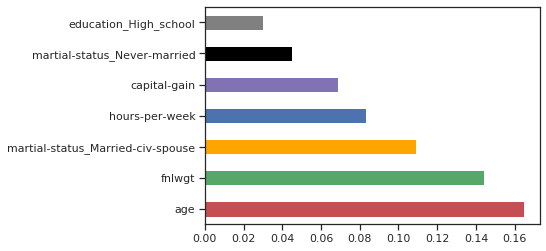

In [57]:
optimized_model = model.best_estimator_
feat_importances = pd.Series(optimized_model.feature_importances_, index=names_features)
feat_importances.nlargest(7).plot(kind='barh', color=['r', 'g', 'orange', 'b', 'm', 'black', 'grey']);

**Feature importances**: the higher, the more important the feature.
The values of this array sum to 1, unless all trees are single node trees consisting of only the root node, in which case it will be an array of zeros.

**Evaluation metrics:**

In [58]:
y_pred = optimized_model.predict(X_test)
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6214
           1       0.74      0.61      0.67      1927

    accuracy                           0.86      8141
   macro avg       0.81      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141



In [59]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.7740442551588066

Accuracy is not the best performance measure for classification when dealing with skewed datasets (some classes are much more frequent than others). 

If classes are imbalanced, a classifier might classify all the observations as belonging to the majority class. The overall accuracy would be very high, but in more detail the classifier would have a 100% recognition rate for the majority class but a 0% recognition rate for the minority class.

In this case, I would prefer to have less false positives (predict as high income when it is not) that would result in a higher precision score. Precision is the metric I would choose as performance measure.

**Precision**: accuracy of the positive predictions

$Precision = \frac{TP}{TP+FP}$

---